구글 드라이브 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


유러피안 콜 옵션 가격을 몬테카를로 시뮬레이션을 통해 계산 (BSM model)

In [ ]:
# 변수 설정

import numpy as np

S0 = 100 # 초기의 주가지수
K = 105 # 행사가격
T = 1.0 # 만기까지 남은 시간
r = 0.05 # 무위험 이자율
sigma = 0.2 # 변동성
I = 100000 # 시뮬레이션 횟수

# 가격결정 알고리즘 구현

z = np.random.standard_normal(I) # 의사 난수
ST = S0 * np.exp((r - 0.5 * sigma ** 2)*T + sigma*np.sqrt(T)*z) # 만기 시의 주가 지수
hT = np.maximum(ST-K, 0) # 만기 시의 내재 가치
C0 = np.exp(-r*T)*np.sum(hT)/T

print( "Value of the European Call option %5.3f" %  C0 )

Value of the European Call option 795633.402


Plot the index level data and the volatility results

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


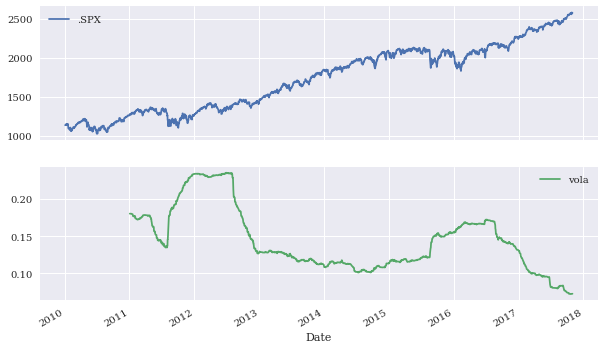

In [ ]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

data = pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', 
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['.SPX'])
data.dropna(inplace=True)
data.info()

data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std()*np.sqrt(252)

data[['.SPX', 'vola']].plot(subplots=True, figsize=(10,6));

PERFORMANCE COMPUTING WITH PYTHON

각 경우의 소요시간 비교 (연산 속도가 점점 빨라짐)

In [ ]:
import math
loops = 250000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]  

10 loops, best of 3: 112 ms per loop


In [ ]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 *np.log(a) + np.cos(a)**2

100 loops, best of 3: 12.7 ms per loop


In [ ]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

100 loops, best of 3: 11.4 ms per loop


In [ ]:
ne.set_num_threads(4)
%timeit r=ne.evaluate(f)

100 loops, best of 3: 9.36 ms per loop


AI-First Finance

scikit-learn

In [ ]:
!pip install sklearn

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', 
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])
data['Returns'] = np.log(data/data.shift())
data.dropna(inplace=True)

In [ ]:
lags = 6

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
data.dropna(inplace=True)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(gamma='auto')

In [ ]:
model.fit(data[cols], np.sign(data['Returns']))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
data['Prediction'] = model.predict(data[cols])

In [ ]:
data['Strategy'] = data['Prediction'] * data['Returns']

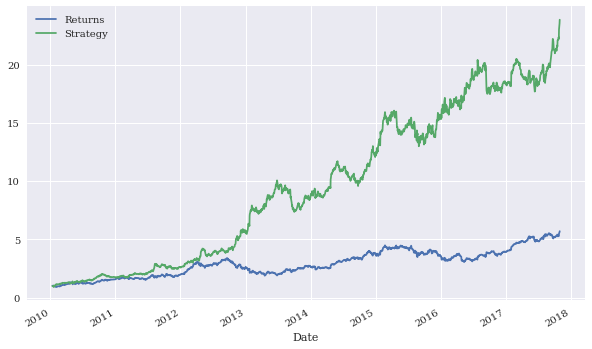

In [ ]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));